SOFTMAX CLASSIFIER USING TENSOR FLOW ON MNIST DATA

Information about data:
    
    -> The dataset inbuilt in Tensor Flow and also available in Kaggle
    
    -> The dataset contains of hand written digits and their corresponding class labels

Objective:
     
    -> Getting started with the Tensor Flow, to get some hands on practise
    
    -> To implement Tensor Flow toolkit on the MNIST dataset
    
    -> To understand the functionality of each observation
    
    -> Training the Neural nets and to check the loss with each Epoch

-> Importing the required Libraries

-> Importing data set

In [62]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Train and Test Data Shape

In [63]:
print(data.train.images.shape)
print(data.test.images.shape)
print(data.train.labels.shape)
print(data.test.labels.shape)

(55000, 784)
(10000, 784)
(55000, 10)
(10000, 10)


In [64]:
print('The number of data point in training are:',data.train.images.shape[0],"and number of features for each data point are",data.train.images.shape[1])
print('The number of data point to test  are:',data.test.images.shape[0],"and number of features for each data point are",data.test.images.shape[1])

The number of data point in training are: 55000 and number of features for each data point are 784
The number of data point to test  are: 10000 and number of features for each data point are 784


In [65]:
print("The shape of the class labels in the train and test dataset after appling One Hot Encoding on the class labels")
print("The number of class labels in training are:",data.train.labels.shape[0],"and each class label is of:",data.train.labels.shape[1],"dimensions")
print("The number of class labels in training are:",data.test.labels.shape[0],"and each class label is of:",data.test.labels.shape[1],"dimensions")

The shape of the class labels in the train and test dataset after appling One Hot Encoding on the class labels
The number of class labels in training are: 55000 and each class label is of: 10 dimensions
The number of class labels in training are: 10000 and each class label is of: 10 dimensions


To check the system requirements availble for Tensor Flow Operations

In [66]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5524967967427380823
]


Placeholders and Variables

In [80]:
x = tf.placeholder(tf.float32, [None,784])
w = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

Predicted and the Actual Class labels

In [81]:
y_ = tf.placeholder(tf.float32, [None,10])
y = tf.nn.softmax(tf.matmul(x,w)+b)

-> Defining the loss function

-> Defining the Optimizer algorithm as Gredient Descent Optimizer

In [82]:
entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y),reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.03).minimize(entropy)

-> Starting the Session

-> Initializing the Variables

In [83]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

C:\Users\Anil Chowdary\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


-> Implementing on subset of data which conatins 5000 data points

-> Creating batches of size 100

In [110]:
for _ in range(5000):
    batch_xs,batch_ys = data.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [111]:
prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(prediction,tf.float32))
print(sess.run(accuracy,feed_dict = {x:data.test.images,y_:data.test.labels}))

0.9195


In [114]:
def dynamic_plot(x, y, y_1, ax, colors=['b']):
    ax.plot(x, y, 'b', label='Train loss')
    ax.plot(x, y_1, 'r', label='Test loss')
    if len(x)==1:
        plt.legend()
    fig.canvas.draw()

Accuracy: 0.9202


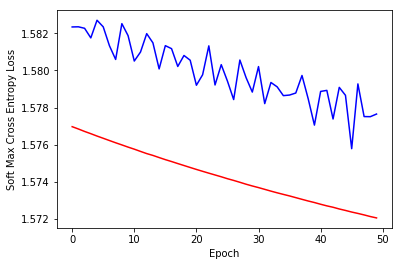

In [115]:
Number_of_epochs = 50
batch_size = 1000
display_step = 1
log_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_))
training = tf.train.GradientDescentOptimizer(0.03).minimize(log_loss)
epchs,ytrainloss,ytestloss = [],[],[]
fig,ax = mp.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel("Soft Max Cross Entropy Loss")
for epoch in range(Number_of_epochs):
    training_loss = 0
    test_loss = 0
    number_of_batches = int(data.train.num_examples/batch_size)
    for i in range(number_of_batches):
        xs_batch,ys_batch = data.train.next_batch(batch_size)
        _,c=sess.run([training,log_loss], feed_dict={x: xs_batch, y_: ys_batch})
        training_loss += c/number_of_batches
        c = sess.run(log_loss,feed_dict = {x:data.test.images,y_:data.test.labels})
        test_loss += c/number_of_batches
    epchs.append(epoch)
    ytrainloss.append(training_loss)
    ytestloss.append(test_loss)
dynamic_plot(epchs,ytrainloss,ytestloss,ax)
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print("Accuracy:",accuracy.eval({x:data.test.images,y_:data.test.labels}))

CONCLUSION:
    
    -> Have gone through different teminologies like Epochs, Batch size, Cross Entropy Loss, Optimizers
    
    -> The accuracy with subset of 5000 points is 91.95
    
    -> The accuracy on the whole data is 92.02